# ML - Logistic Regression on Pima Diabetes dataset

In [1]:
# Import python libraries: NumPy and Pandas and its classes
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

# Import libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

#Import libraries for modeling
from sklearn.linear_model import LogisticRegression

# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

### Loading Dataset

In [2]:
df = pd.read_csv('pima_diabetes.csv')

### Performing Exploratory Data Analysis

In [3]:
# Getting to know the dimensions or shape of the dataset, number of records, rows X number of variables, columns
print(df.shape)

(768, 9)


In [4]:
# Getting to know the data types of all the variables / attributes in the data set
print(df.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [5]:
# Returning the first five records, rows of the data set
print(df.head(5))

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [6]:
# Returning the summary statistics of the numeric variables, attributes in the data set
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

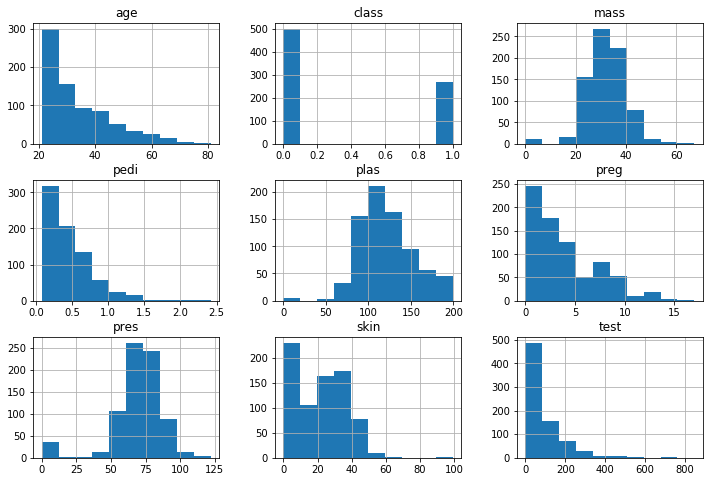

In [7]:
# Plotting histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
plt.show()

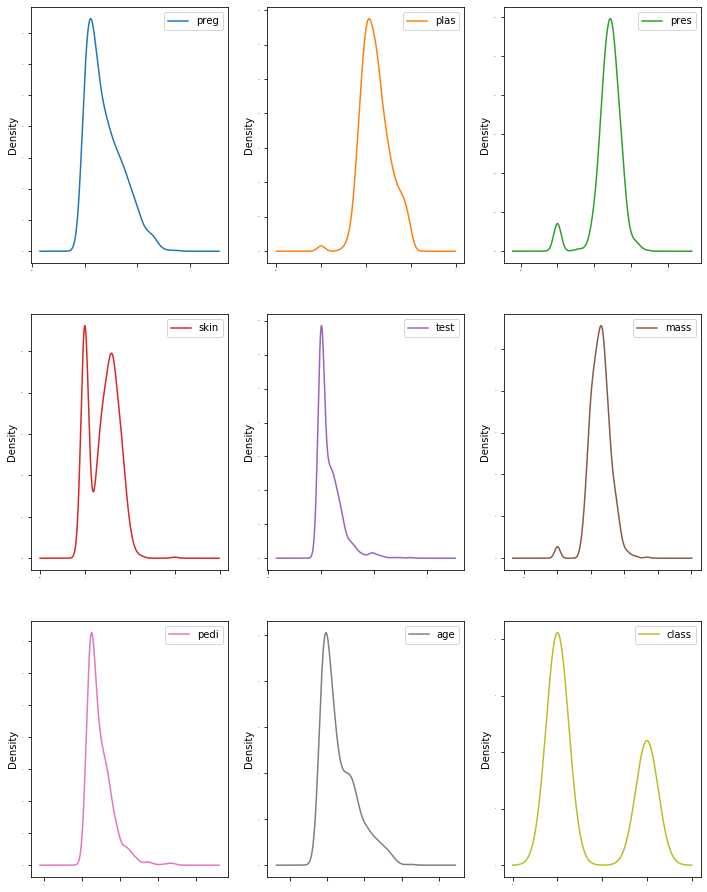

In [8]:
# Generating the density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
plt.show()

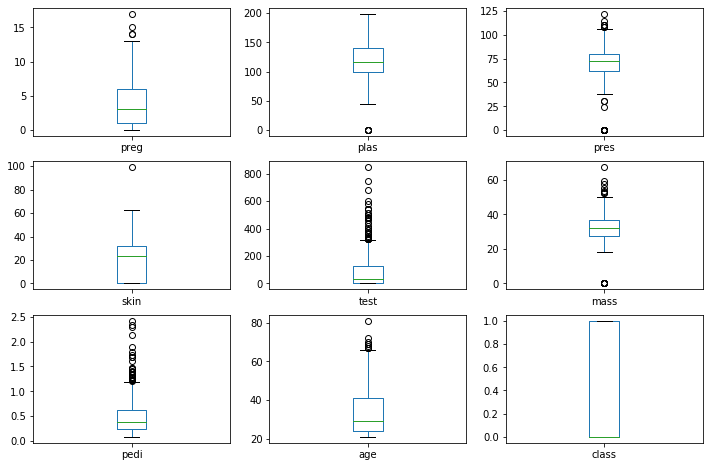

In [9]:
# Generating the box plots of each numeric variable, attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
plt.show()

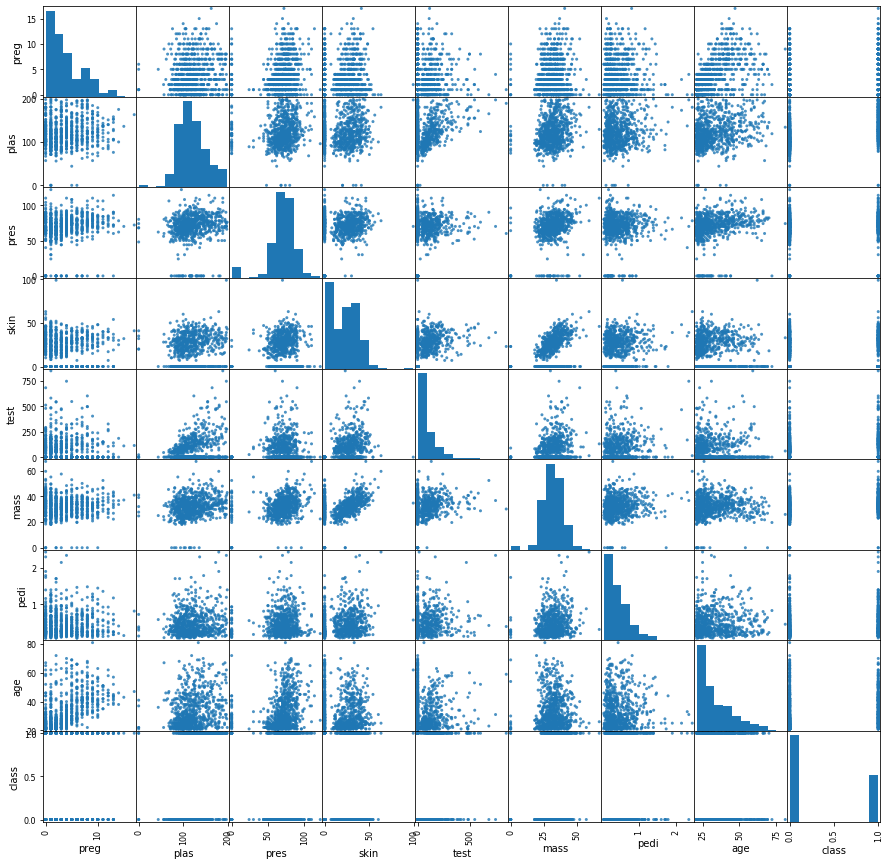

In [10]:
# Generating the scatter plot matrix of each numeric variable, attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

### Separate Dataset into Input & Output NumPy arrays

In [11]:
# Storing dataframe values into a numpy array
array = df.values

In [12]:
# Separating the array into input and output by slicing
X = array[:,0:-1]
Y = array[:,-1]

### Split Input/Output Arrays into Training/Testing Datasets

In [13]:
# Spliting the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33

# Selecting of records to include in each data sub-dataset must be done randomly
seed = 7

# Spliting the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

### Building / Training a model

In [14]:
# Building the model
model = LogisticRegression()

# Training the model using the training sub-dataset
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



### Score the accuracy of the model

In [16]:
# Scoring the accuracy level
result = model.score(X_test, Y_test)

In [17]:
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 78.740%


### 1st Prediction

In [18]:
model.predict([[4,121,69,20,80,32,0.472,33]])

array([0.])

### 2nd Prediction

In [19]:
model.predict([[6,140,80,32,127,37,0.626,41]])

array([1.])

### Evaluate the model using the 10-fold cross-validation technique.

In [20]:
# Evaluating the algorythm, specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# Fixing the random seed must use the same seed value so that the same subsets can be obtained for each time the process is repeated
seed = 7

# Spliting the whole dataset into k equal sized subsamples. 
kfold = KFold(n_splits, random_state=seed)

# For logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# Training the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

In [21]:
# Printing the evaluationm results obtained from the K-fold
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.773 (0.055)
